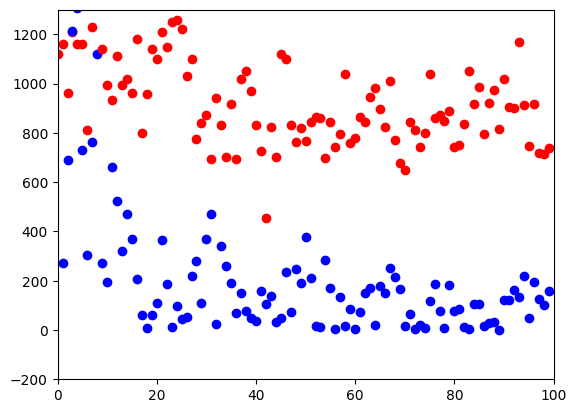

In [131]:
import scipy
import numpy as np
import numpy.linalg as la
import scipy.linalg as spla
import matplotlib.pyplot as plt

n=100
X = scipy.fft.dct(np.eye(n), norm='ortho')

f=[1120, 1160, 963, 1210, 1160, 1160, 813, 1230, 1370, 1140,
   995, 935, 1110, 994, 1020, 960, 1180, 799, 958, 1140,
   1100, 1210, 1150, 1250, 1260, 1220, 1030, 1100, 774, 840, 
   874, 694, 940, 833, 701, 916, 692, 1020, 1050, 969, 
   831, 726, 456, 824, 702, 1120, 1100, 832, 764, 821, 
   768, 845, 864, 862, 698, 845, 744, 796, 1040, 759, 
   781, 865, 845, 944, 984, 897, 822, 1010, 771, 676, 
   649, 846, 812, 742, 801, 1040, 860, 874, 848, 890, 
   744, 749, 838, 1050, 918, 986, 797, 923, 975, 815, 
   1020, 906, 901, 1170, 912, 746, 919, 718, 714, 740]

X0=np.zeros((90,100))
f0=np.zeros((90,1))
z=0
for i in range(100):
    if(0<=i<=20 or 30<i<=100):
        X0[z]=X[i]
        f0[z]=f[i]
        z=z+1
        
w=(X0.dot(X0.T))**(-1)
x=X0.T.dot(w).dot(f0)
        
U, sigma, VT = la.svd(X0)
Sigma = np.zeros(X0.shape)
Sigma[:90,:90] = np.diag(sigma)

Sigma_pinv = np.zeros(X0.shape).T
Sigma_pinv[:90,:90] = np.diag(1/sigma[:90])

x_svd = VT.T.dot(Sigma_pinv).dot(U.T).dot(f0)
        
    
plt.xlim(0, 100)
plt.ylim(-200, 1300)

for i in range(100):
    plt.scatter(i,f[i],color='r')
    plt.scatter(i,abs(x_svd[i]),color='b')
    plt.scatter(i,abs(x[i]),color='g')
    
       


All the points found from least square are out of this graph. Clearly, the regularization(blue) helps a lot. Least square is inaccurat

200


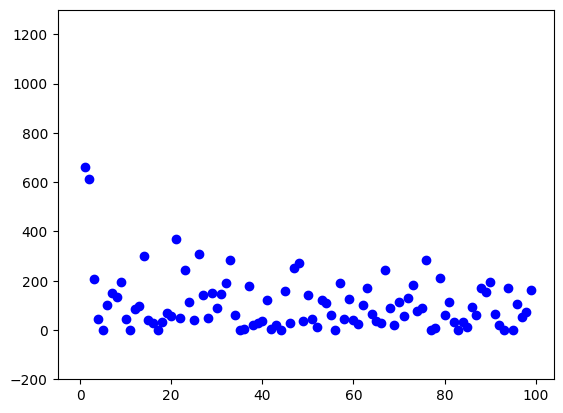

In [137]:
c=np.ones((1,200))
A=np.zeros((90,200))

for i in range(90):
    A[i][0:100]=X0[i]
    A[i][100:200]=-X0[i]
    
u= (0, None)
xx=scipy.optimize.linprog(c, A_eq=A, b_eq=f0, bounds=[u])
plt.ylim(-200, 1300)
for a in range(100):
    lum[a]=abs(xx.x[a])+abs(xx.x[a+100])
    plt.scatter(a,lum[a],color='b')


The result from problem 2 is similar to the solution of regularized least squares

For question 4, using the complementary slackness equation to find primal variable. 

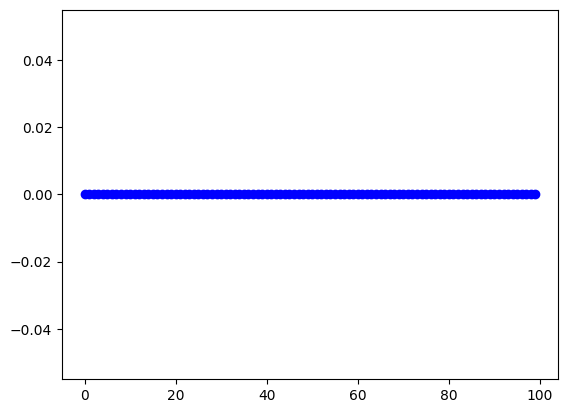

In [194]:
cc=np.ones((100,1))
ff=np.ones((180,1))
AA=np.zeros((180,100))
for i in range(90):
    ff[i]=f0[i]
    ff[i+90]=f0[i]
    AA[i][0:100]=X0[i]
    AA[i+90][0:100]=-X0[i]
    
l=scipy.optimize.linprog(ff.T, A_ub=AA.T, b_ub=cc, bounds=[u])

for a in range(90):
    lum[a]=abs(l.x[a])+abs(l.x[a+90])

x = f0.T.dot(lum).dot((cc.T)**(-1))
xx=x.T
for a in range(100):
    plt.scatter(a,xx[a],color='b')